In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd



url ="C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data"  # laptop
url_2= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.names"  # laptop
url_3 = "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob_2\\DrivFace\\drivPoints.csv"  # C:\Users\Дмитрий\Desktop\datasets\bob_2\DrivFace

In [6]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"  ]



In [7]:
pd.read_csv(url_3) # оценка водителей или распознование лица при вождении

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,20130529_01_Driv_003_f,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,20130529_01_Driv_004_f,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,20130529_01_Driv_005_f,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,20130530_04_Driv_086_f,4,86,2,-15,278,183,128,141,307,218,354,210,330,247,324,273,356,266
602,20130530_04_Driv_087_lr,4,87,1,-30,268,186,128,134,296,222,344,212,319,247,316,274,347,269
603,20130530_04_Driv_088_lr,4,88,1,-30,264,187,127,131,287,220,334,211,304,247,305,272,337,270
604,20130530_04_Driv_089_f,4,89,2,-15,264,175,143,136,295,207,345,200,320,234,314,261,351,251


In [8]:
import pandas as pd
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

for i in list(bob):
    try:
        bob[i]=bob[i].str.strip() 
    except:
        print(i)

list_class=bob['class'].to_list()
dict_class={}
a=1
for i in list_class:
 
    if i not in dict_class.keys():
        dict_class[i]=a
        a+=1
# bob=bob.fillna(0)
bob=bob.dropna()
bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
bob=bob.dropna()
np.array(bob['class'].to_list())


leaves


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [9]:
bob.head(2)

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,1,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,1,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0


In [10]:
X=bob[list(bob)[1:]].astype(int).to_numpy()
y=bob[list(bob)[1]].astype(int).to_numpy()


Метод k-средних

Шаг 1. Вначале возьмем данные и самостоятельно выберем желаемое количество кластеров и обозначим их буквой k (отсюда название метода). Пусть в данном случае их будет три.
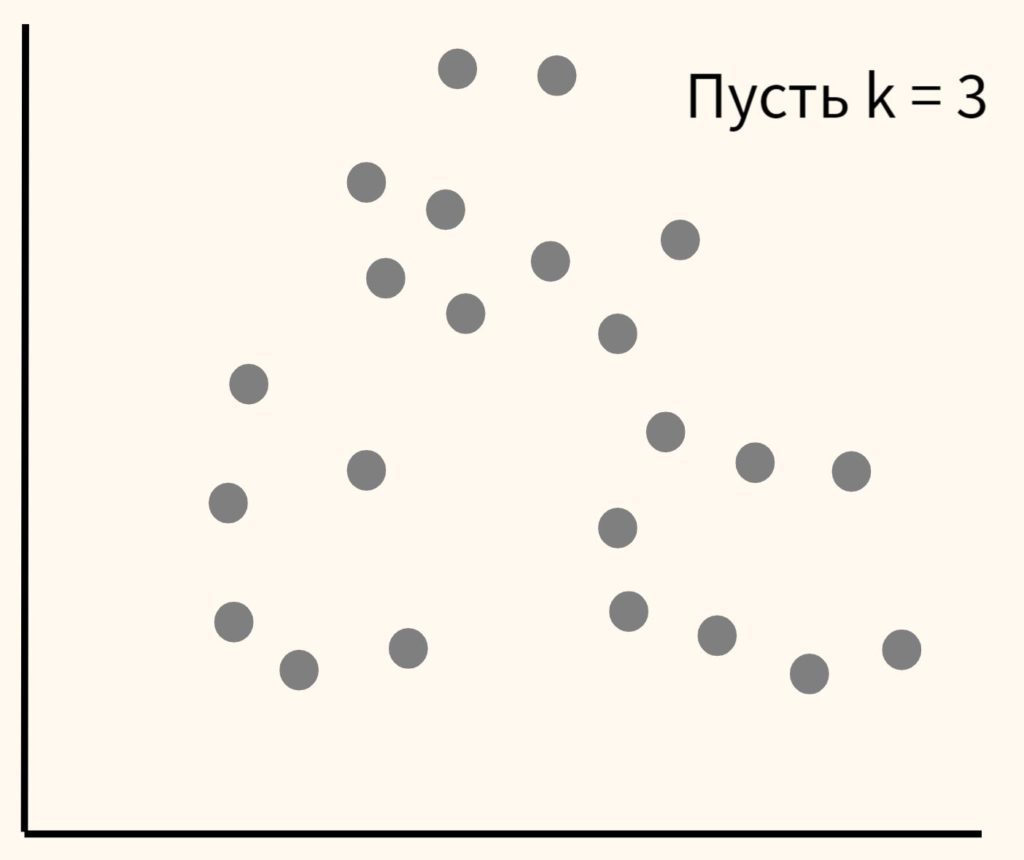 
Шаг 2. Расположим несколько точек. Их количество будет равно количеству кластеров. Эти точки называются центроидами. Посчитаем расстояние от наших данных до каждого из центроидов. Логично отнести наблюдение к тому центроиду, который находится ближе.
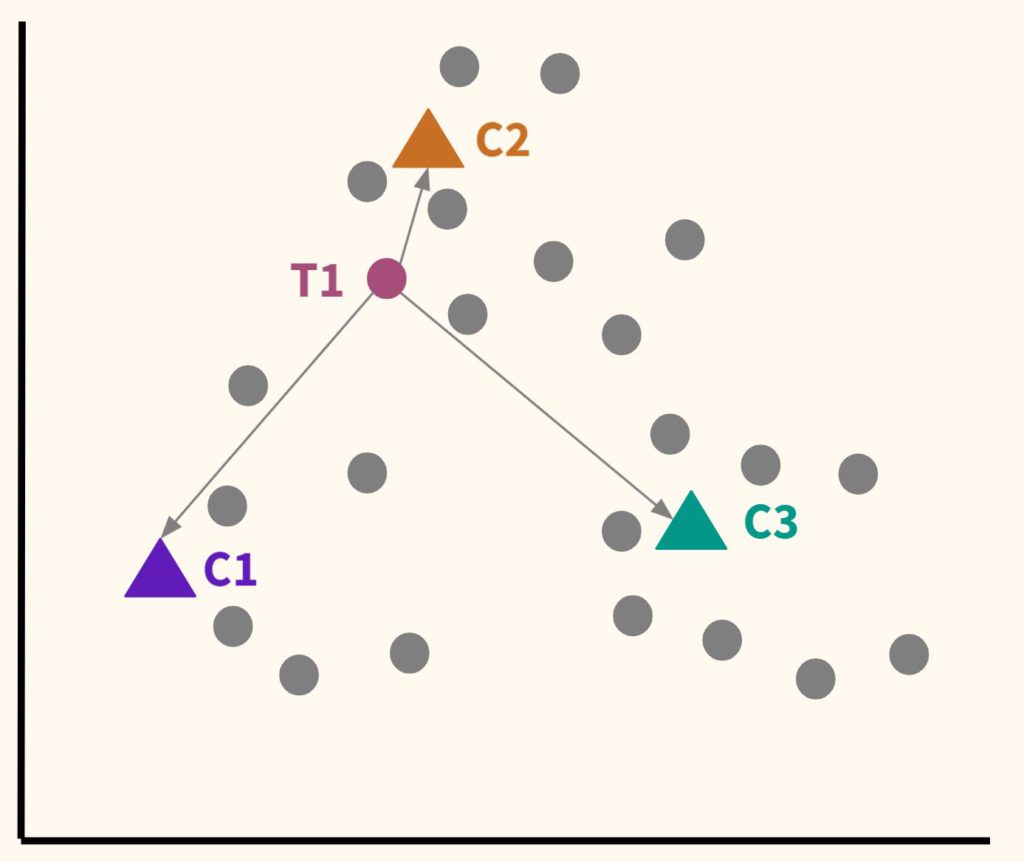

Шаг 3. Таким образом, каждая точка будет отнесена к определенному центроиду (кластеру).
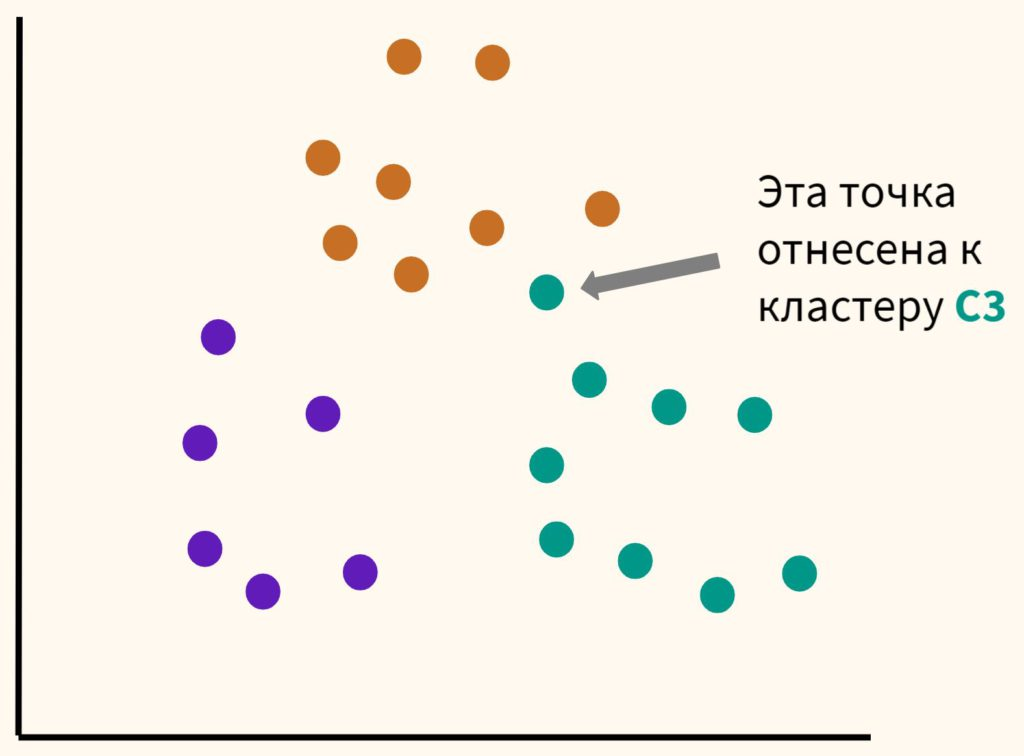

Шаг 4. Сместим наши центроиды в центр получившихся кластеров.
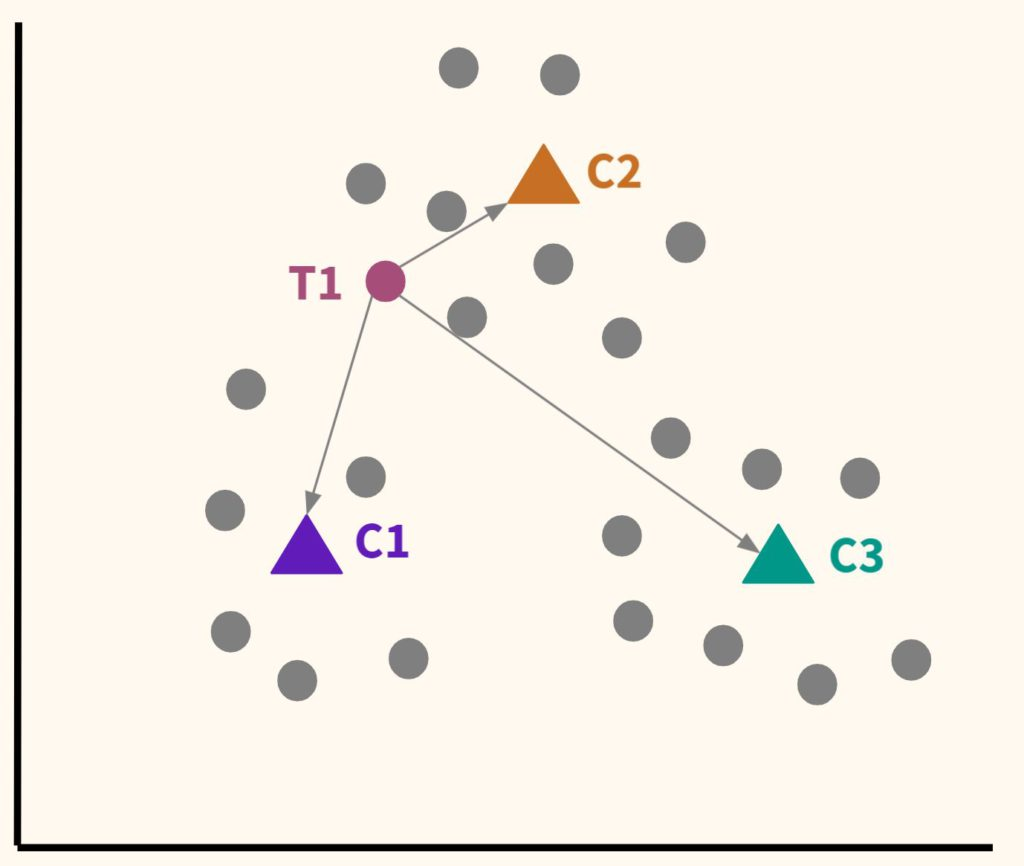

Шаг 5. Вновь отнесем точки к каждому из центроидов. Некоторые наблюдения «переметнутся» к другому центроиду.

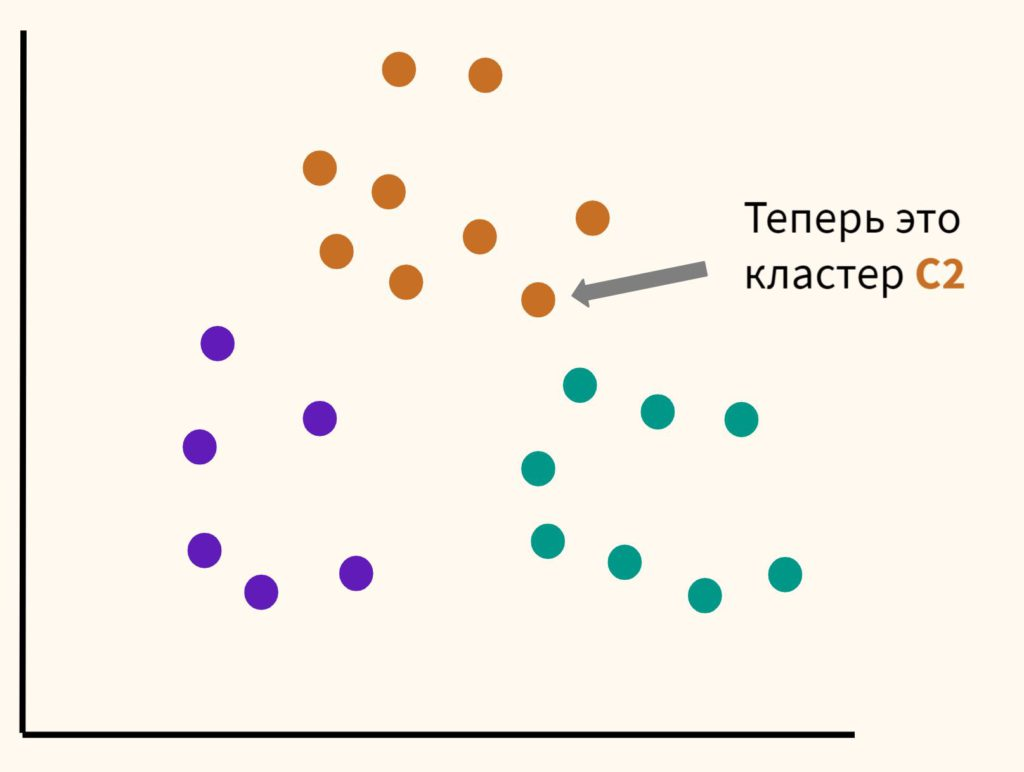

Мы будем повторять шаги 4 и 5 до тех пор, пока алгоритм не стабилизируется, то есть до тех пор, пока наблюдения не перестанут переходить от одного центроида (кластера) к другому.
https://www.dmitrymakarov.ru/wp-content/uploads/2021/07/wcss-3-1-1200x653.jpg

Алгомеративная кластеризация (agglomerative clustering) относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы: алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворен определенный критерии остановки. Критерий остановки, реализованный в scikit-learn - это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров. Есть несколько критериев связи (linkage), которые задают точный способ измерения "наиболее схожего кластера". В основе этих критериев лежит расстояние между двумя существующими кластерами.



Силуэт — более подходящая метрика

Коэффициент «силуэт» вычисляется с помощью среднего внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому образцу. Силуэт вычисляется как (b - a) / max(a, b). Поясню: b — это расстояние между a и ближайшим кластером, в который a не входит. Можно вычислить среднее значение силуэта по всем образцам и использовать его как метрику для оценки количества кластеров.


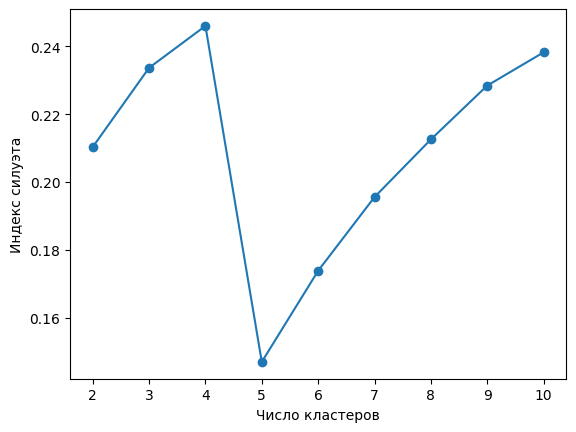

Лучшее число кластеров для иерархической кластеризации: 4


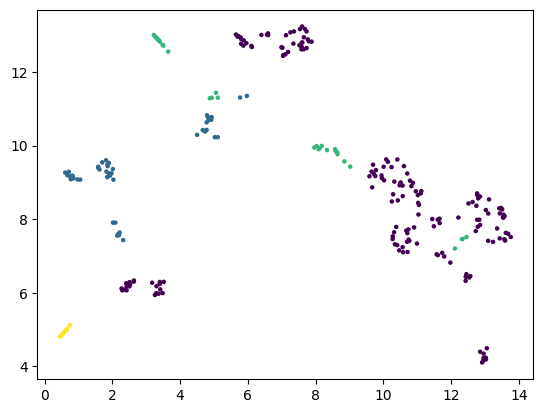

In [11]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация
agglomerative_clusterings = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X_scaled)
    agglomerative_clusterings.append(model)

# Оценка качества кластеризации
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in agglomerative_clusterings]

# Построение графика метода локтя
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Индекс силуэта')
plt.show()

# Выбор лучшего алгоритма кластеризации
best_agglomerative_model = agglomerative_clusterings[np.argmax(silhouette_scores)] #argmax - Возвращает индексы максимальных значений по оси.
print("Лучшее число кластеров для иерархической кластеризации:", best_agglomerative_model.n_clusters)

# Визуализация результатов кластеризации с помощью UMAP
reducer     =umap.UMAP()
embedding   =reducer.fit_transform(X_scaled)
plt.scatter(embedding[:, 0], embedding[:, 1], c=best_agglomerative_model.labels_, cmap='viridis', s=5) # s- Размер маркера в пунктах  # c -Цвета маркера
plt.show()


In [12]:
import pandas as pd

bob = pd.read_csv(url_3)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

# for i in list(bob):
#     try:
#         bob[i]=bob[i].str.strip() 
#     except:
#         print(i)

# list_class=bob['class'].to_list()
# dict_class={}
# a=1
# for i in list_class: 
#     if i not in dict_class.keys():
#         dict_class[i]=a
#         a+=1

# bob=bob.dropna()
# bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
# bob=bob.dropna()
# # np.array(bob['class'].to_list())


In [16]:
bob.head(2)

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281


In [13]:
X=bob[list(bob)[2:]].astype(int).to_numpy()
y=bob[list(bob)[1]].astype(int).to_numpy()


In [14]:
len(y)

606

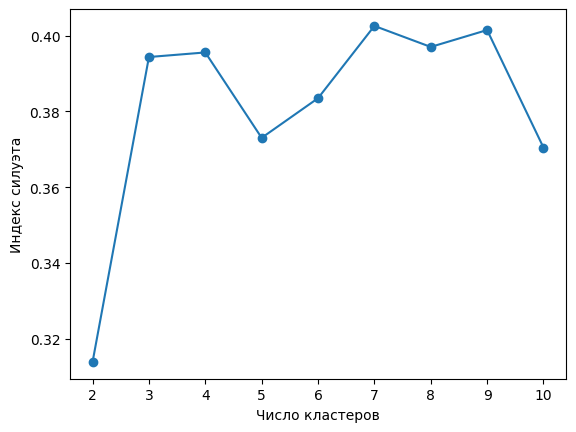

Лучшее число кластеров для иерархической кластеризации: 7


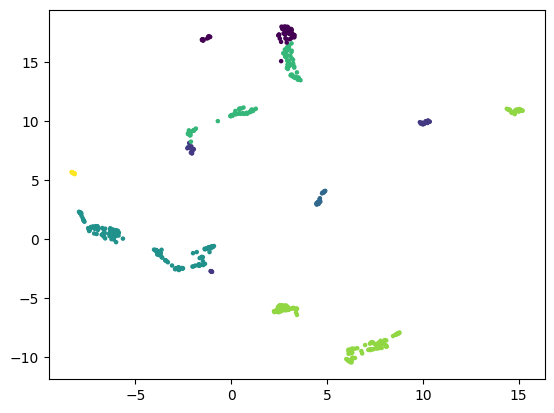

In [15]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация
agglomerative_clusterings = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X_scaled)
    agglomerative_clusterings.append(model)

# Оценка качества кластеризации
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in agglomerative_clusterings]

# Построение графика метода локтя
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Индекс силуэта')
plt.show()

# Выбор лучшего алгоритма кластеризации
best_agglomerative_model = agglomerative_clusterings[np.argmax(silhouette_scores)]
print("Лучшее число кластеров для иерархической кластеризации:", best_agglomerative_model.n_clusters)

# Визуализация результатов кластеризации с помощью UMAP
reducer     =umap.UMAP()
embedding   =reducer.fit_transform(X_scaled)
plt.scatter(embedding[:, 0], embedding[:, 1], c=best_agglomerative_model.labels_, cmap='viridis', s=5)
plt.show()
